In [1]:
import networkx as nx


In [6]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

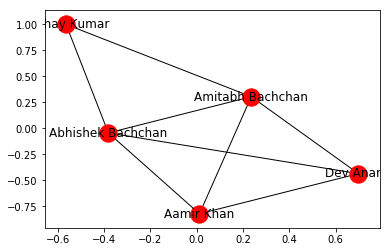

In [7]:
nx.draw_networkx(G_symmetric)
plt.show()

In [8]:
G_asymmetric = nx.DiGraph() # directional graph
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

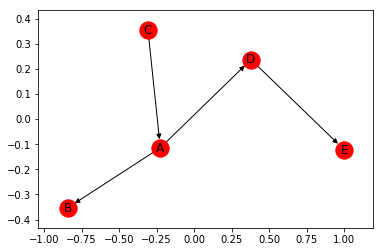

In [16]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

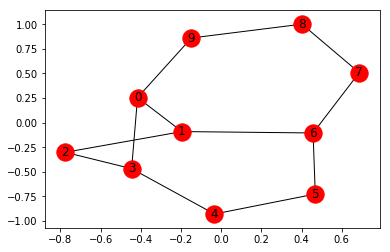

In [43]:
# Now trying out some random graphs
n = 10
k = 3
p = 0.1
G = nx.newman_watts_strogatz_graph(n, k, p)
nx.spring_layout(G)
nx.draw_networkx(G)


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


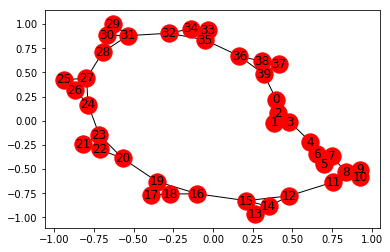

In [161]:
G = nx.connected_caveman_graph(10,4)
nx.spring_layout(G)
nx.draw_networkx(G)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


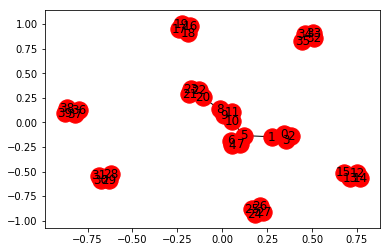

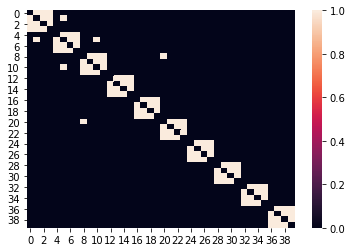

In [96]:
import seaborn as sns
G = nx.caveman_graph(10,4)
G.add_edges_from([(1, 5),(10,5),(8,20)]) # use this to randomly connect families, draw connections from binomial connectivities
# can use these binomials to make there be pockets who cannot socially isolate as well
# add edges to introduce social distancing
plt.figure()
nx.spring_layout(G)
nx.draw_networkx(G)
plt.figure()
sns.heatmap(nx.to_numpy_array(G))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


DegreeView({0: 6, 1: 6, 2: 5, 3: 5, 4: 4, 5: 5, 6: 7, 7: 6, 8: 5, 9: 6, 10: 4, 11: 5, 12: 6, 13: 4, 14: 9, 15: 8, 16: 8, 17: 8, 18: 5, 19: 5, 20: 4, 21: 5, 22: 8, 23: 4, 24: 5, 25: 4, 26: 4, 27: 5, 28: 6, 29: 4, 30: 5, 31: 5, 32: 5, 33: 8, 34: 5, 35: 8, 36: 4, 37: 7, 38: 9, 39: 5, 40: 6, 41: 5, 42: 6, 43: 4, 44: 5, 45: 6, 46: 5, 47: 6, 48: 6, 49: 5, 50: 7, 51: 10, 52: 6, 53: 5, 54: 6, 55: 9, 56: 5, 57: 6, 58: 7, 59: 6, 60: 5, 61: 7, 62: 4, 63: 7, 64: 5, 65: 4, 66: 7, 67: 7, 68: 4, 69: 10, 70: 7, 71: 5, 72: 5, 73: 6, 74: 7, 75: 9, 76: 7, 77: 4, 78: 8, 79: 7, 80: 5, 81: 6, 82: 6, 83: 5, 84: 9, 85: 5, 86: 6, 87: 5, 88: 5, 89: 8, 90: 5, 91: 7, 92: 10, 93: 7, 94: 8, 95: 6, 96: 5, 97: 7, 98: 8, 99: 8})

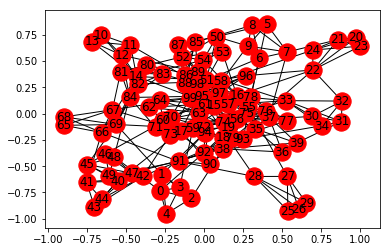

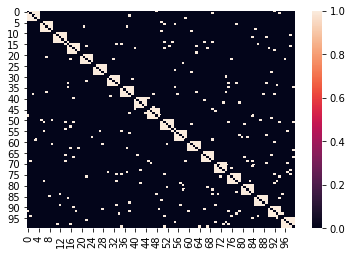

In [6]:
from numpy import random as rnd
import seaborn as sns
# oh yeah baby

G = nx.caveman_graph(20,5)
C = rnd.binomial(1,.01,100**2).reshape(100,100)
x,y = np.where(C == 1) # extract connections
G.add_edges_from([i for i in zip(x,y)]) # collect nonzeros

plt.figure()
nx.spring_layout(G)
nx.draw_networkx(G)
plt.figure()
sns.heatmap(nx.to_numpy_array(G))

In [9]:
G = nx.relaxed_caveman_graph(200, 5, .1) # this is not fast, also don't get the connectivity we want
plt.figure()
nx.spring_layout(G)
nx.draw_networkx(G)
# nx.draw_networkx_nodes(G)
plt.figure()
sns.heatmap(nx.to_numpy_array(G))

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

<Figure size 432x288 with 0 Axes>

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


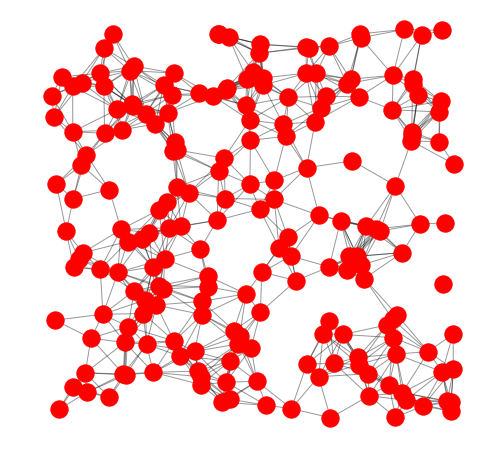

In [8]:
# find node near center (0.5,0.5)

# G = nx.connected_caveman_graph(20,5)
# G = nx.watts_strogatz_graph(10,3,.3)
# G = nx.connected_caveman_graph(10,4)
G = nx.random_geometric_graph(200, 0.125)

# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

nx.draw_networkx_nodes(G, pos)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

(array([ 516.,    0., 1043.,    0.,  376.,    0.,   57.,    0.,    6.,
           2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

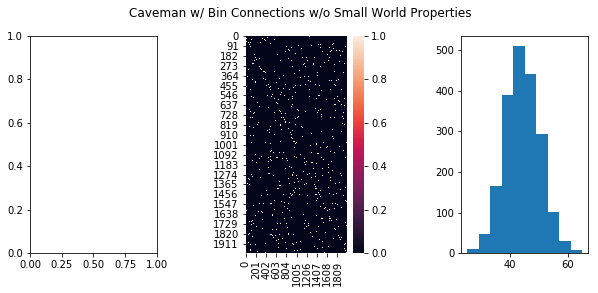

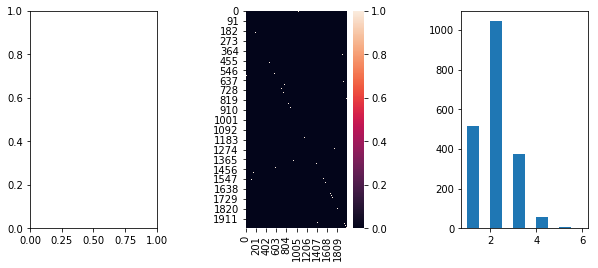

In [46]:
from numpy import random as rnd
import seaborn as sns

# the caveman model does NOT display small world properties

# is there a better way to plot this?

G = nx.caveman_graph(400,5)
C = rnd.binomial(1,.01,2000**2).reshape(2000,2000)
x,y = np.where(C == 1) # extract connections
G.add_edges_from([i for i in zip(x,y)]) # collect nonzeros

plt.figure(figsize = [10,4])
plt.subplots_adjust(wspace = .7)
plt.suptitle('Caveman w/ Bin Connections w/o Small World Properties')
plt.subplot(1,3,1)
# nx.spring_layout(G)
# nx.draw_networkx(G)
plt.subplot(1,3,2)
sns.heatmap(nx.to_numpy_array(G))

D = G.degree()
degrees = np.array(list(D))[:,1]
plt.subplot(1,3,3)
plt.hist(degrees)

G2 = nx.watts_strogatz_graph(2000,2,.4)

plt.figure(figsize = [10,4])
plt.subplots_adjust(wspace = .7)
plt.title('Watts-Strogatz with Small World Properties')
plt.subplot(1,3,1)
# nx.spring_layout(G2)
# nx.draw_networkx(G2)
plt.subplot(1,3,2)
sns.heatmap(nx.to_numpy_array(G2))

D = G2.degree()
degrees = np.array(list(D))[:,1]
plt.subplot(1,3,3)
plt.hist(degrees)